In [2]:
# ✅ Install all required packages (run once)
!pip install tensorflow opencv-python tqdm scikit-learn matplotlib

# ✅ Imports
import numpy as np
import tensorflow as tf
import cv2
import os
import pickle
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Sequential

# ------------------------------------------
# 🧠 Load pre-trained MobileNetV2 model
# ------------------------------------------
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalMaxPooling2D()
])

print("✅ MobileNetV2 model loaded successfully!")

# ------------------------------------------
# 🧩 Feature Extraction Function
# ------------------------------------------
def extract_features(img_path, model):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        expanded_img_array = np.expand_dims(img_array, axis=0)
        preprocessed_img = preprocess_input(expanded_img_array)
        result = model.predict(preprocessed_img, verbose=0).flatten()
        normalized_result = result / np.linalg.norm(result)
        return normalized_result
    except Exception as e:
        print(f"⚠️ Error processing {img_path}: {e}")
        return np.zeros((1280,))  # fallback in case of error

# ------------------------------------------
# 📁 Load or Create List of Image Filenames
# ------------------------------------------
# Example: If your images are in 'images/' folder
image_folder =  r"D:\images"  # 🔹 Change this to your actual folder
filenames = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.jpg', '.png', '.jpeg'))]
print(f"✅ Total images found: {len(filenames)}")

# ------------------------------------------
# 🧮 Choose a sample of 1000 (for testing)
# ------------------------------------------
selected_files = random.sample(filenames, 1000) if len(filenames) > 1000 else filenames

# ------------------------------------------
# ⚙️ Extract Features with Progress Bar
# ------------------------------------------
feature_list = []

print("\n🚀 Starting feature extraction...\n")
for file in tqdm(selected_files, desc="Extracting features", unit="image"):
    feature_list.append(extract_features(file, model))

feature_array = np.array(feature_list)
print("\n✅ Feature extraction complete!")
print("Feature array shape:", feature_array.shape)

# ------------------------------------------
# 💾 Save features and filenames
# ------------------------------------------
with open("embeddings.pkl", "wb") as f:
    pickle.dump(feature_array, f)

with open("filenames.pkl", "wb") as f:
    pickle.dump(selected_files, f)

print("💾 Files saved: 'embeddings.pkl' and 'filenames.pkl'")


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Alisha Varma\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ MobileNetV2 model loaded successfully!
✅ Total images found: 44441

🚀 Starting feature extraction...



Extracting features: 100%|███████████████████████████████████████████████████████████████████| 1000/1000 [02:29<00:00,  6.69image/s]



✅ Feature extraction complete!
Feature array shape: (1000, 1280)
💾 Files saved: 'embeddings.pkl' and 'filenames.pkl'


Loading saved features...
✅ Features and filenames loaded!
Feature array shape: (1000, 1280)
Total filenames: 1000
✅ MobileNetV2 model loaded for similarity search!

🔍 Finding similar images for: watch.jpg

✅ Similar images found! Displaying results...


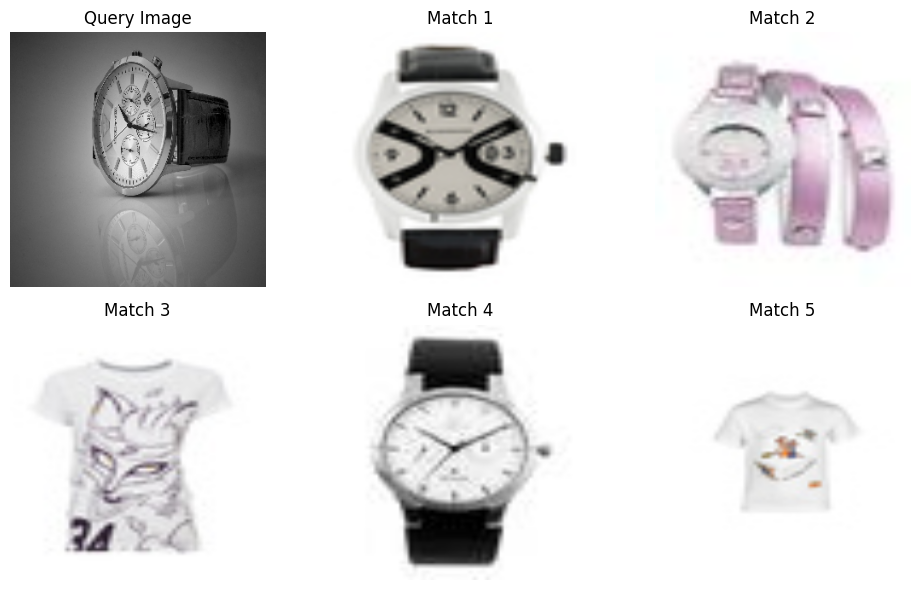

In [5]:
# ✅ Imports
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from numpy.linalg import norm

# ------------------------------------------
# 💾 Load saved embeddings and filenames
# ------------------------------------------
print("Loading saved features...")
feature_list = np.array(pickle.load(open('embeddings.pkl', 'rb')))
filenames = pickle.load(open('filenames.pkl', 'rb'))
print("✅ Features and filenames loaded!")
print("Feature array shape:", feature_list.shape)
print("Total filenames:", len(filenames))

# ------------------------------------------
# 🧠 Reuse the same feature extractor
# ------------------------------------------
def extract_features(img_path, model):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        expanded_img_array = np.expand_dims(img_array, axis=0)
        preprocessed_img = preprocess_input(expanded_img_array)
        result = model.predict(preprocessed_img, verbose=0).flatten()
        normalized_result = result / norm(result)
        return normalized_result
    except Exception as e:
        print(f"⚠️ Error processing {img_path}: {e}")
        return np.zeros((1280,))

# ------------------------------------------
# 🧩 Load your pre-trained MobileNetV2 again
# (same as before)
# ------------------------------------------
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Sequential

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalMaxPooling2D()
])
print("✅ MobileNetV2 model loaded for similarity search!")

# ------------------------------------------
# 📸 Choose your query image
# ------------------------------------------
query_image_path = "watch.jpg"  # 🔹 change this to your test image path

print(f"\n🔍 Finding similar images for: {query_image_path}")
query_features = extract_features(query_image_path, model)

# ------------------------------------------
# 🔎 Find 5 most similar images
# ------------------------------------------
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

distances, indices = neighbors.kneighbors([query_features])

print("\n✅ Similar images found! Displaying results...")

# ------------------------------------------
# 🖼️ Display the query image + top 5 matches
# ------------------------------------------
plt.figure(figsize=(10, 6))

# Show query image
plt.subplot(2, 3, 1)
query_img = cv2.imread(query_image_path)
query_img = cv2.cvtColor(cv2.resize(query_img, (300, 300)), cv2.COLOR_BGR2RGB)
plt.imshow(query_img)
plt.title("Query Image")
plt.axis('off')

# Show top 5 similar images
for i, idx in enumerate(indices[0][1:6]):
    img = cv2.imread(filenames[idx])
    img = cv2.cvtColor(cv2.resize(img, (300, 300)), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i + 2)
    plt.imshow(img)
    plt.title(f"Match {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
